In [2]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [3]:
import os
import pandas as pd
import medvqa
from medvqa.utils.files import load_pickle
from medvqa.evaluation.results import get_report_level_metrics_dataframe

In [82]:
df = get_report_level_metrics_dataframe('mimiccxr')

In [64]:
df['bleu'] = (df['b1'] + df['b2'] + df['b3'] + df['b4']) / 4

In [66]:
df['metrics_path_short'] = [os.path.basename(x)[-50:] for x in df['metrics_path']]

In [67]:
df.columns

Index(['b1', 'b2', 'b3', 'b4', 'bert_score_f1', 'bert_score_p', 'bert_score_r',
       'cD', 'chxb_acc', 'chxb_f1(A)',
       ...
       'vm-frozen', 'mergef', 'medtok', 'amp', 'aug', 'gradacc_iters',
       'ensemble', 'input_labels', 'bleu', 'metrics_path_short'],
      dtype='object', length=160)

In [68]:
# df_aux = df.sort_values(['exp_timestamp'], ascending=False)
df_aux = df.sort_values(['modif_time'], ascending=False)
# df_aux = df.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux[['folder', 'modif_time', 'exp_timestamp', 'model', 'ensemble', 'input_labels', 'medtok', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'epoch', 'eval_mode', 'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_f1(sample)', 'bleu', 'cD', 'rg-L', 'met']]
df_aux = df_aux[['folder', 'metrics_path_short', 'modif_time', 'exp_timestamp', 'model', 'datasets', 'eval_mode',
                 'chxp_f1(macro)', 'chxb_f1(macro)',
#                  'chxp_f1(micro)', 'chxb_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(sample)',
                 'radgraph_f1(sample)', 'radgraph_jaccard(sample)',
#                  'radgraph_p(sample)', 'radgraph_r(sample)',
                 'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_p', 'fact_embedding_r',
                 'bert_score_f1', # 'bert_score_p', 'bert_score_r',
#                  'bleu', 'cD', 'rg-L', 'met',
                ]]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('qclass')]
df_aux[:10]
# df_aux[(0.45 < df_aux['f1(macro)']) & (df_aux['f1(macro)'] < 0.5)]
# df_aux[:55][df_aux.columns[:15]]

,folder,metrics_path_short,modif_time,exp_timestamp,model,datasets,eval_mode,chxp_f1(macro),chxb_f1(macro),radgraph_f1(sample),radgraph_jaccard(sample),fact_embedding_soft,fact_embedding_f1,fact_embedding_p,fact_embedding_r,bert_score_f1
287,phrase_grounding,"port_gen_metrics(chexpert,tuned_thresholds,v1)...",2024-04-30 23:13:36,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.437503,0.427113,0.122644,0.067169,0.615927,0.406090,0.525432,0.361732,0.481878
285,phrase_grounding,"mimic_cxr_lt+chest_imagenome,tuned_thresholds)...",2024-04-30 18:15:22,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.406709,0.342747,0.049880,0.025717,0.649073,0.407469,0.399386,0.491618,0.263093
284,phrase_grounding,"_gen_metrics(chest_imagenome,tuned_thresholds)...",2024-04-30 17:49:52,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.372040,0.316035,0.049652,0.025606,0.641591,0.395743,0.389037,0.474293,0.232772
286,phrase_grounding,"ort_gen_metrics(mimic_cxr_lt,tuned_thresholds)...",2024-04-30 17:27:36,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.414775,0.286129,0.077808,0.040958,0.624296,0.392420,0.480586,0.367359,0.374768
283,phrase_grounding,"_report_gen_metrics(chexpert,tuned_thresholds)...",2024-04-30 17:23:41,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.385771,0.308175,0.091541,0.048689,0.615851,0.391133,0.499974,0.350250,0.399711
234,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:37:51,20231006_012451,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.826383,0.843711,0.414482,0.268264,0.943410,0.973685,0.983328,0.965943,0.890250
239,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:24:38,20231006_011239,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.685846,0.746556,0.307431,0.185848,0.896501,0.932327,0.938624,0.927950,0.875174
245,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:12:26,20231006_010441,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.634994,0.670604,0.255650,0.149796,0.836137,0.832114,0.839330,0.829116,0.866813
242,report_gen,"=template-based,fact-embedding-labels--oracle)...",2023-10-06 01:04:28,20231006_005349,oracle,1:mimiccxr,"template-based,fact-embedding-labels--oracle",0.632871,0.670732,0.240523,0.139654,0.833207,0.831063,0.840075,0.826357,0.865164
272,report_gen,"l_mode=template-based,chexbert-labels--oracle)...",2023-10-05 16:43:22,20231005_164140,oracle,1:mimiccxr,"template-based,chexbert-labels--oracle",0.920525,0.906746,0.122158,0.066918,0.663651,0.453688,0.677324,0.370895,0.848637


In [69]:
_dataframe_rows = [
#     df.loc[(df['exp_timestamp'] == '20231005_161501') & (df['modif_time'] == '2023-10-05 16:18:55')].iloc[0],
    
#     df.loc[(df['exp_timestamp'] == '20231006_012451') & (df['modif_time'] == '2023-10-06 01:37:51')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_011239') & (df['modif_time'] == '2023-10-06 01:24:38')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_010441') & (df['modif_time'] == '2023-10-06 01:12:26')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231006_005349') & (df['modif_time'] == '2023-10-06 01:04:28')].iloc[0],
    
#     df.loc[(df['exp_timestamp'] == '20231005_164140') & (df['modif_time'] == '2023-10-05 16:43:22')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231005_163629') & (df['modif_time'] == '2023-10-05 16:38:26')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231005_162957') & (df['modif_time'] == '2023-10-05 16:34:05')].iloc[0],
    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 18:15:22')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:49:52')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:27:36')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 17:23:41')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-04-30 23:13:36')].iloc[0],    
    

#     df.loc[(df['exp_timestamp'] == '20230830_175739') & (df['modif_time'] == '2023-08-30 17:59:20')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_175542') & (df['modif_time'] == '2023-08-30 17:57:18')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_175143') & (df['modif_time'] == '2023-08-30 17:55:29')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230830_174854') & (df['modif_time'] == '2023-08-30 17:50:36')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20230831_233901') & (df['modif_time'] == '2023-08-31 23:54:37')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231001_194409') & (df['modif_time'] == '2023-10-01 19:56:53')].iloc[0],
#     df.loc[(df['exp_timestamp'] == '20231001_204513') & (df['modif_time'] == '2023-10-01 20:46:44')].iloc[0],
]
_method_aliases = [
#     'Fact Extractor (T5)',
    
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=50000)',
#     'CXR Fact Encoder (obs=1000, al=300, nlabels=10000)',
#     'CXR Fact Encoder (obs=200, al=50, nlabels=5000)',
#     'CXR Fact Encoder (obs=200, al=50, nlabels=1000)',
    
#     'CheXbert (template-based)',
#     'CheXpert labeler (template-based)',
#     'Chest ImaGenome (template-based)',
    
    'Phrase Grounding (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Phrase Grounding (template-based, ChestImaGenome (78 facts))',
    'Phrase Grounding (template-based, MIMIC_CXR_LT (26 facts))',
    'Phrase Grounding (template-based, CheXpert (14 facts))',
    'Phrase Grounding (template-based (pdpino), CheXpert (14 facts))',
    
#     'CheXbert',
#     'CheXpert labeler',
#     'Chest ImaGenome',
#     'CXR Fact Encoder (obs=4000, al=300, nlabels=5000)',
#     'CXR Fact Encoder (obs=8000, al=300, nlabels=10000)',
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=20000)',
#     'CXR Fact Encoder (obs=10000, al=300, nlabels=20000) v2',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [70]:
from medvqa.evaluation.plots import plot_per_class_classification_metrics

In [71]:
%matplotlib inline

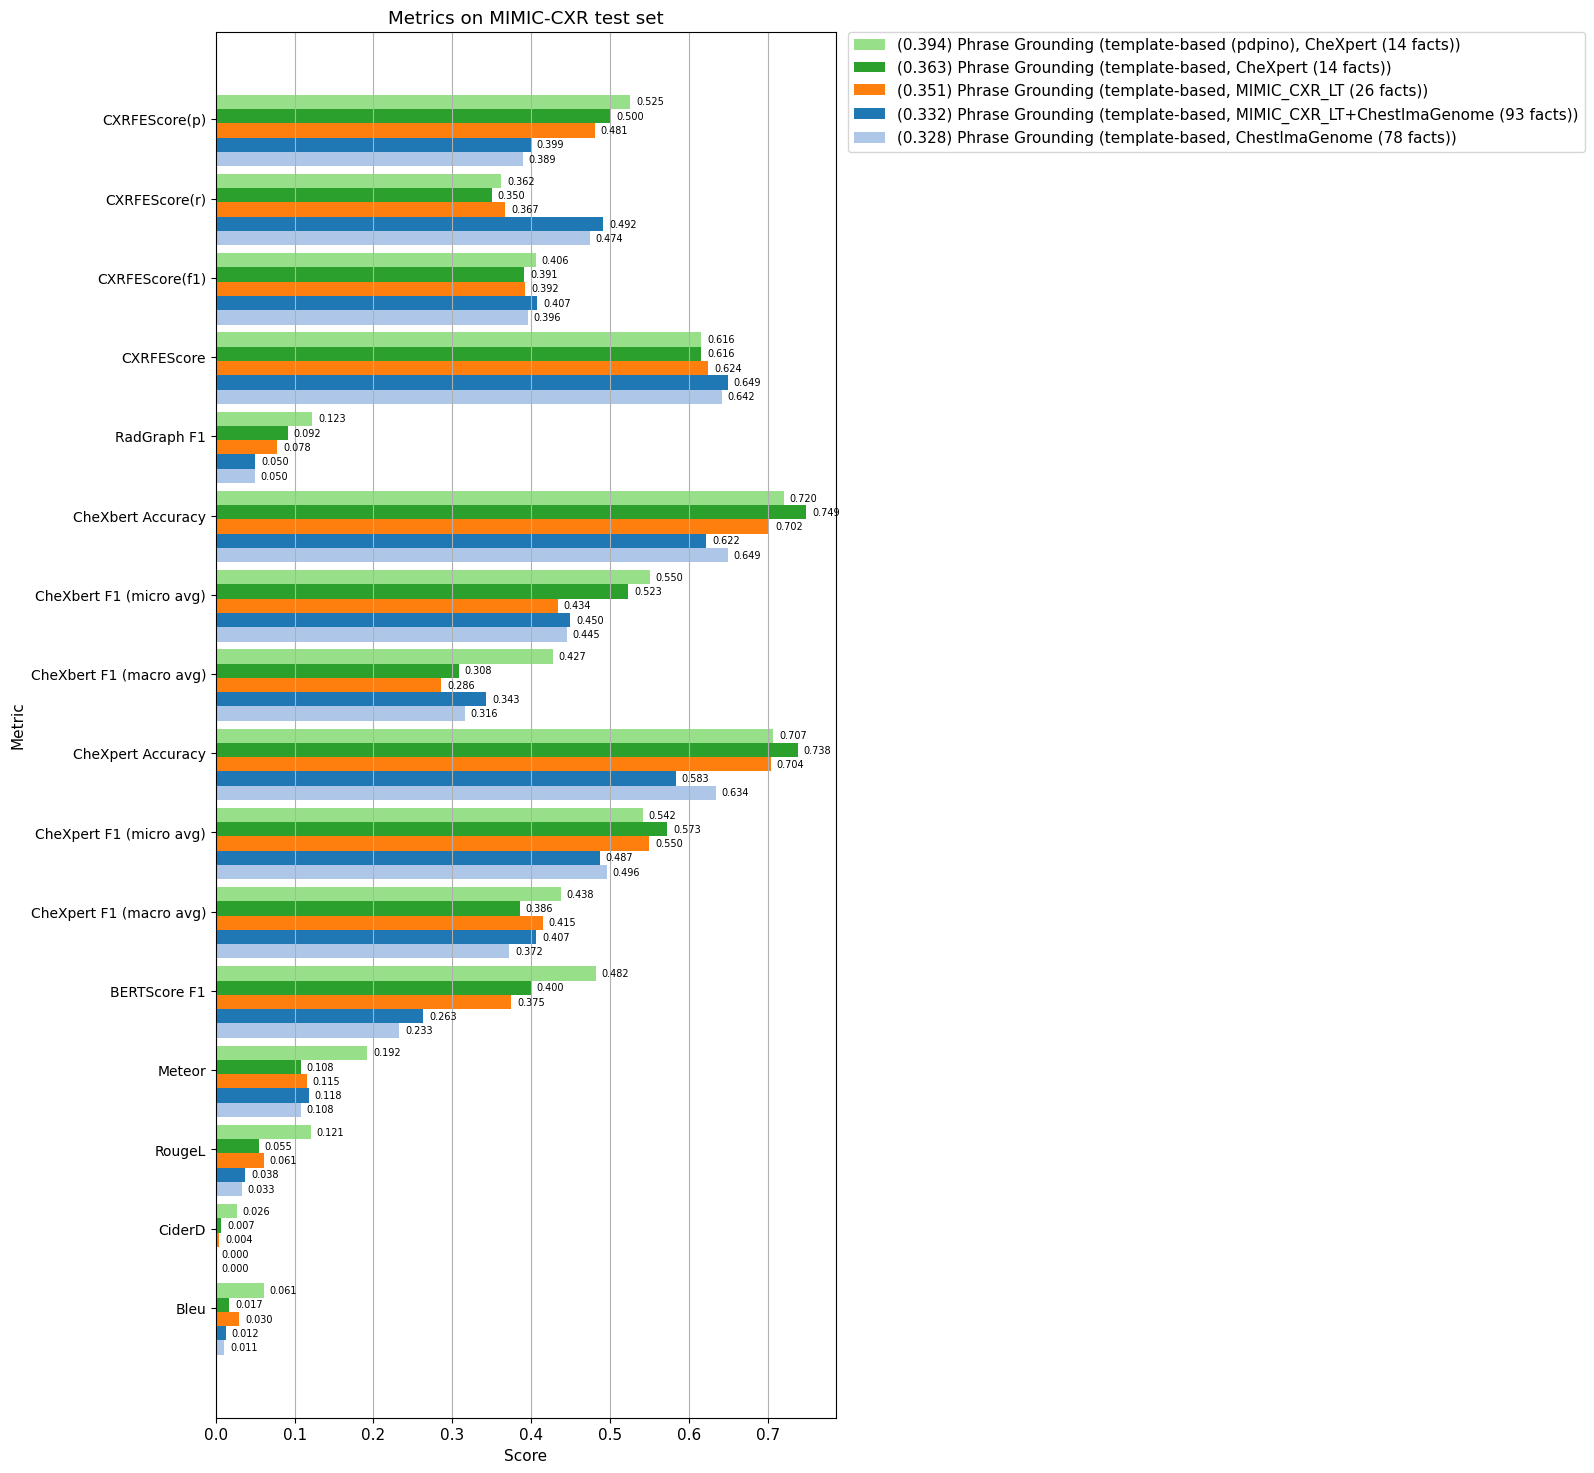

In [72]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_per_class_classification_metrics(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='MIMIC-CXR test set',
    figsize=(8, 18),
    sort_metrics=False,
)

In [4]:
df = get_report_level_metrics_dataframe('interpret')

   ** Not cached key: ('/mnt/data/pamessina/workspaces/medvqa-workspace/results/phrase_grounding/20240505_224220_mim-facts+vinbig+chexloc+chxp_PhraseGrounder(dn121,128,256)/interpret_cxr_test_public_report_gen_metrics(json_to_gpt,findings).pkl', 1715080675.878137)
Report level metrics updated and saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/report_level_metrics_cache.pkl


In [5]:
df['bleu'] = (df['b1'] + df['b2'] + df['b3'] + df['b4']) / 4

In [6]:
df['metrics_path_short'] = [os.path.basename(x)[-50:] for x in df['metrics_path']]

In [7]:
df.columns

Index(['b1', 'b2', 'b3', 'b4', 'bert_score_f1', 'bert_score_p', 'bert_score_r',
       'cD', 'chxb_acc', 'chxb_f1(A)',
       ...
       'vm-frozen', 'mergef', 'medtok', 'amp', 'aug', 'gradacc_iters',
       'ensemble', 'input_labels', 'bleu', 'metrics_path_short'],
      dtype='object', length=158)

In [8]:
# df_aux = df.sort_values(['exp_timestamp'], ascending=False)
df_aux = df.sort_values(['modif_time'], ascending=False)
# df_aux = df.sort_values(['f1(macro)'], ascending=False)
# df_aux = df_aux[['folder', 'modif_time', 'exp_timestamp', 'model', 'ensemble', 'input_labels', 'medtok', 'datasets', 'vinbig_mode', 'vm-frozen', 'pretrained', 'amp', 'aug', 'mergef', 'epoch', 'eval_mode', 'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_f1(sample)', 'bleu', 'cD', 'rg-L', 'met']]
df_aux = df_aux[['folder', 'metrics_path_short', 'modif_time', 'exp_timestamp', 'model', 'datasets', 'eval_mode',
                 'chxp_f1(macro)', 'chxb_f1(macro)',
#                  'chxp_f1(micro)', 'chxb_f1(micro)', 'chxp_f1(sample)', 'chxb_f1(sample)',
                 'radgraph_f1(sample)', 'radgraph_jaccard(sample)',
#                  'radgraph_p(sample)', 'radgraph_r(sample)',
                 'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_p', 'fact_embedding_r',
                 'bert_score_f1', # 'bert_score_p', 'bert_score_r',
#                  'bleu', 'cD', 'rg-L', 'met',
                ]]
# df_aux = df_aux[df_aux['eval_mode'].str.contains('qclass')]
df_aux[:10]
# df_aux[(0.45 < df_aux['f1(macro)']) & (df_aux['f1(macro)'] < 0.5)]
# df_aux[:55][df_aux.columns[:15]]

,folder,metrics_path_short,modif_time,exp_timestamp,model,datasets,eval_mode,chxp_f1(macro),chxb_f1(macro),radgraph_f1(sample),radgraph_jaccard(sample),fact_embedding_soft,fact_embedding_f1,fact_embedding_p,fact_embedding_r,bert_score_f1
0,phrase_grounding,"ublic_report_gen_metrics(json_to_gpt,findings)...",2024-05-07 07:17:55,20240505_224220,"PhraseGrounder(dn121,128,256)",4:mim-facts+vinbig+chexloc+chxp,****************,0.390608,0.404659,0.083023,0.044092,0.590843,0.376065,0.383797,0.427769,0.436913
5,phrase_grounding,"+chest_imagenome,template,findings,thresholds)...",2024-05-01 14:09:48,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.373316,0.318451,0.043676,0.022444,0.657038,0.430588,0.395789,0.552263,0.240239
6,phrase_grounding,"(chest_imagenome,template,findings,thresholds)...",2024-05-01 14:03:39,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.344966,0.293754,0.044556,0.022921,0.648662,0.418999,0.385163,0.534247,0.209572
3,phrase_grounding,"ics(mimic_cxr_lt,template,findings,thresholds)...",2024-05-01 13:58:22,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.401009,0.295175,0.078552,0.041415,0.635240,0.430375,0.483127,0.425538,0.375023
7,phrase_grounding,"rics(chexpert,template,findings,thresholds,v1)...",2024-05-01 13:56:34,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.440006,0.430174,0.129478,0.071563,0.624426,0.443551,0.522857,0.416257,0.504211
1,phrase_grounding,"r_lt+chest_imagenome,template,both,thresholds)...",2024-05-01 13:35:03,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.392330,0.329554,0.044578,0.022953,0.656031,0.420777,0.396590,0.535165,0.249939
8,phrase_grounding,"rics(chest_imagenome,template,both,thresholds)...",2024-05-01 13:18:06,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.364520,0.304762,0.044299,0.022816,0.648006,0.409222,0.385798,0.516058,0.219266
2,phrase_grounding,"metrics(mimic_cxr_lt,template,both,thresholds)...",2024-05-01 13:02:16,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.416805,0.300209,0.072345,0.038059,0.631798,0.412327,0.474958,0.404884,0.368618
4,phrase_grounding,"_metrics(chexpert,template,both,thresholds,v1)...",2024-05-01 12:59:01,20240426_072308,"PhraseGrounder(dn121,128,256)",1:mim-facts,****************,0.454022,0.443689,0.113011,0.061799,0.621416,0.426224,0.509159,0.401550,0.477530


In [9]:
_dataframe_rows = [    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:35:03')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:18:06')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:02:16')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 12:59:01')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240505_224220') & (df['modif_time'] == '2024-05-07 07:17:55')].iloc[0],
]
_method_aliases = [
    'Phrase Grounding (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Phrase Grounding (template-based, ChestImaGenome (78 facts))',
    'Phrase Grounding (template-based, MIMIC_CXR_LT (26 facts))',
    'Phrase Grounding (template-based (pdpino), CheXpert (14 facts))',
    'Phrase Grounding (JSON to GPT-4, 93 facts heuristically filtered)',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [10]:
from medvqa.evaluation.plots import plot_per_class_classification_metrics

In [11]:
%matplotlib inline

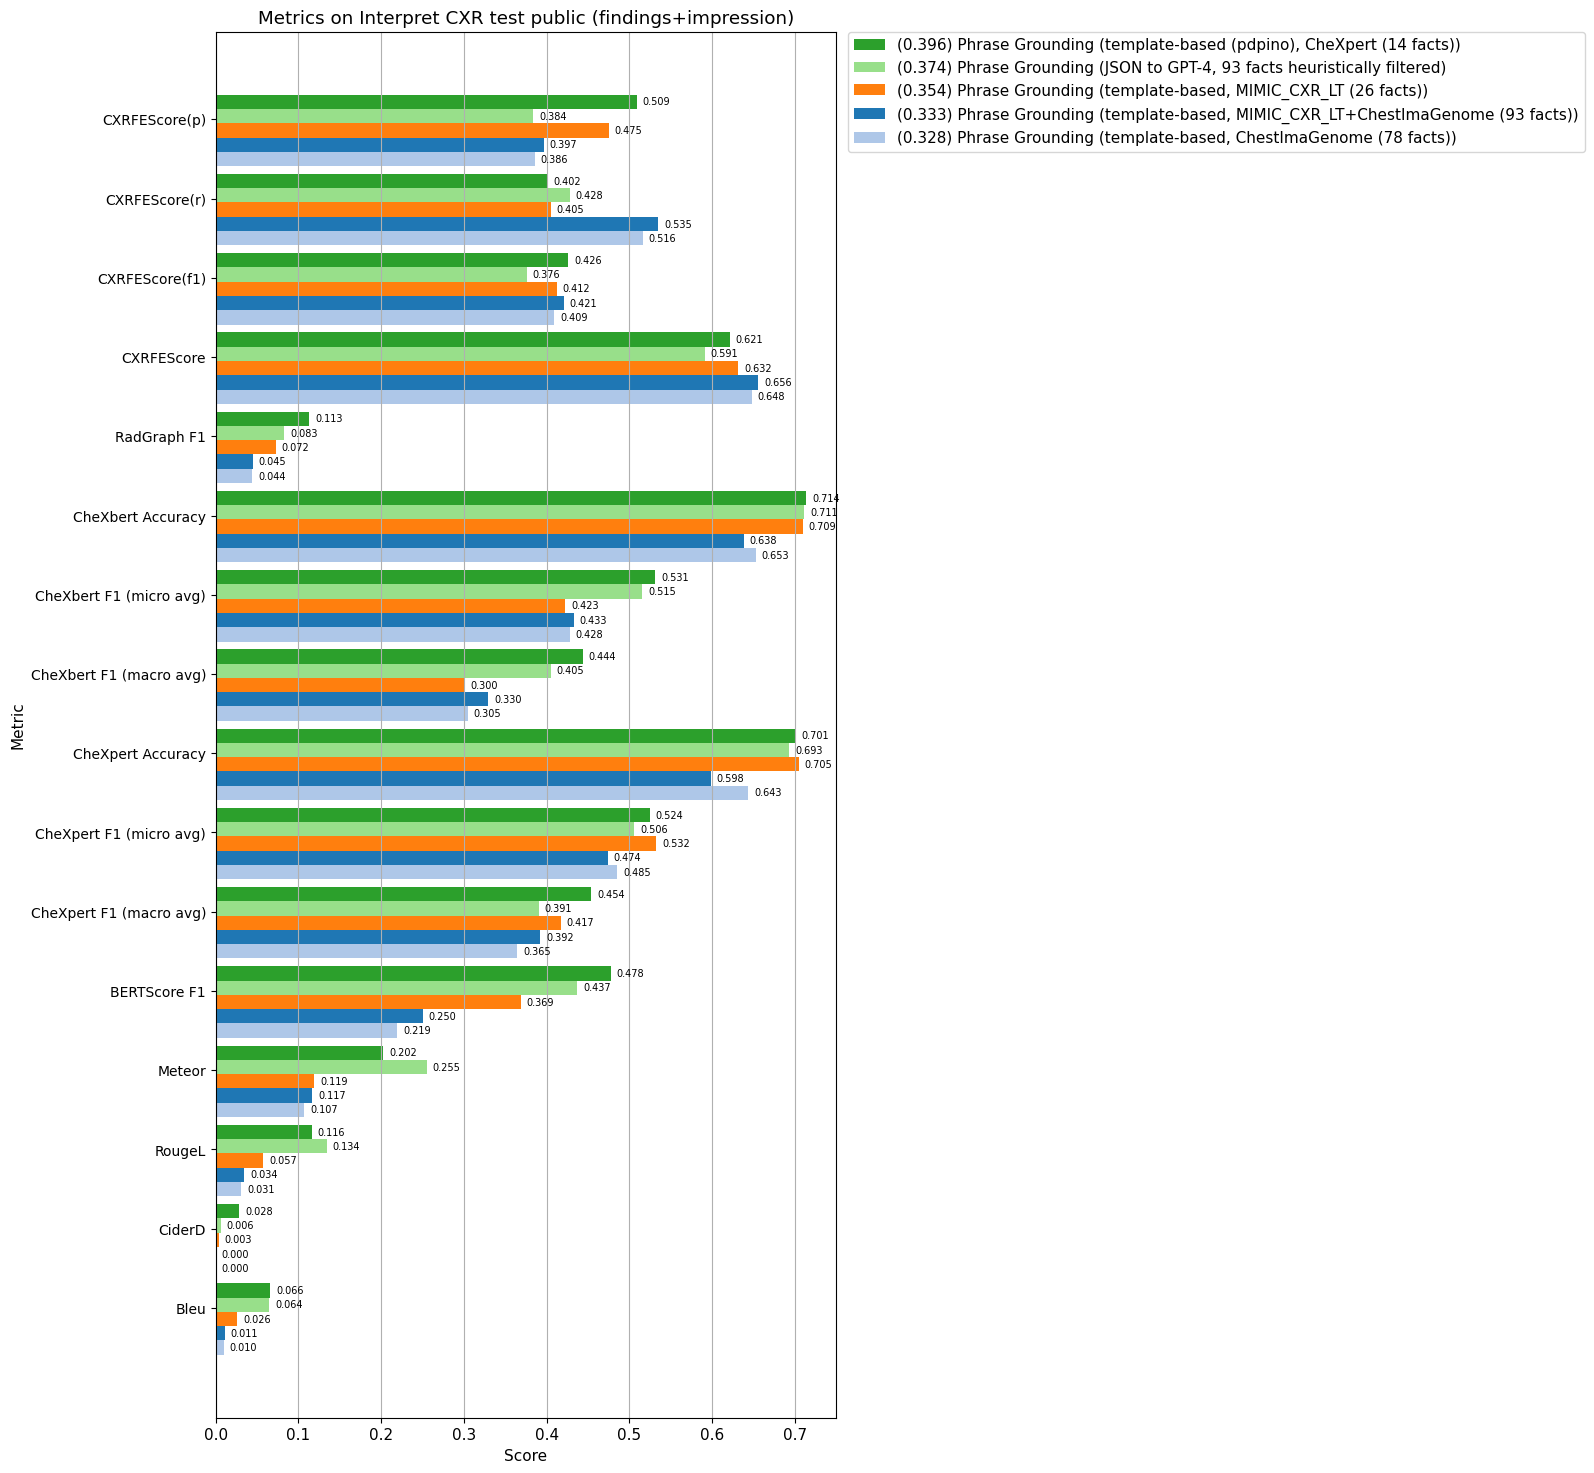

In [12]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_per_class_classification_metrics(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='Interpret CXR test public (findings+impression)',
    figsize=(8, 18),
    sort_metrics=False,
)

In [106]:
_dataframe_rows = [    
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 14:09:48')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 14:03:39')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:58:22')].iloc[0],
    df.loc[(df['exp_timestamp'] == '20240426_072308') & (df['modif_time'] == '2024-05-01 13:56:34')].iloc[0],
]
_method_aliases = [
    'Phrase Grounding (template-based, MIMIC_CXR_LT+ChestImaGenome (93 facts))',
    'Phrase Grounding (template-based, ChestImaGenome (78 facts))',
    'Phrase Grounding (template-based, MIMIC_CXR_LT (26 facts))',
    'Phrase Grounding (template-based (pdpino), CheXpert (14 facts))',
]
assert len(_dataframe_rows) == len(_method_aliases)

In [107]:
from medvqa.evaluation.plots import plot_per_class_classification_metrics

In [108]:
%matplotlib inline

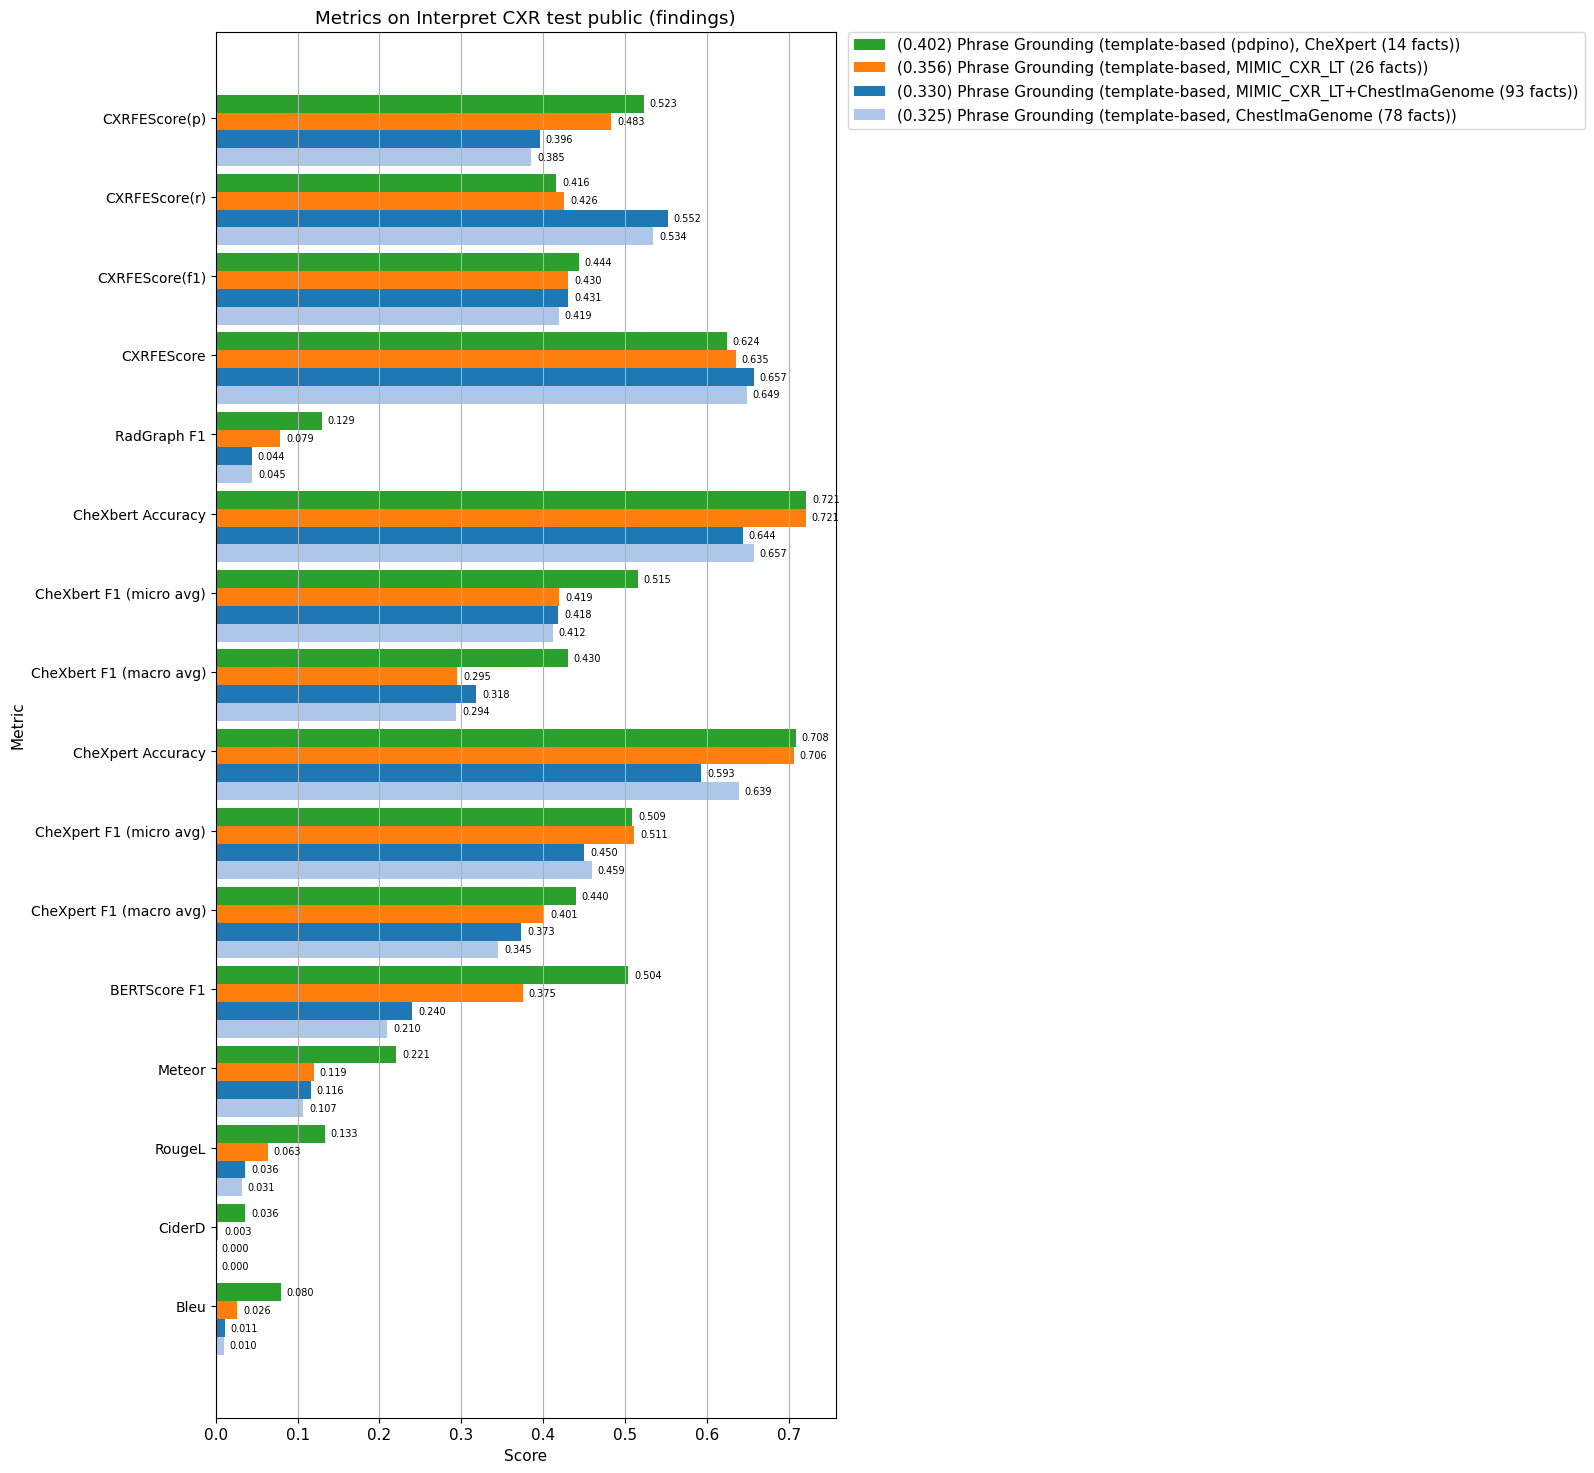

In [109]:
metric_names = ['bleu', 'cD', 'rg-L', 'met', 'bert_score_f1',
                'chxp_f1(macro)', 'chxp_f1(micro)', 'chxp_acc',
#                 'chxp_f1(macro-5)', 'chxp_f1(micro-5)',
                'chxb_f1(macro)', 'chxb_f1(micro)', 'chxb_acc',
#                 'chxb_f1(macro-5)', 'chxb_f1(micro-5)',
                'radgraph_f1(sample)', 
                'fact_embedding_soft', 'fact_embedding_f1', 'fact_embedding_r', 'fact_embedding_p',
               ]
metric_aliases = ['Bleu', 'CiderD', 'RougeL', 'Meteor', 'BERTScore F1',
                  'CheXpert F1 (macro avg)', 'CheXpert F1 (micro avg)', 'CheXpert Accuracy',
#                   'CheXpert F1 (macro-5)', 'CheXpert F1 (micro-5)',
                  'CheXbert F1 (macro avg)', 'CheXbert F1 (micro avg)', 'CheXbert Accuracy',
#                   'CheXbert F1 (macro-5)', 'CheXbert F1 (micro-5)',
                  'RadGraph F1',
                  'CXRFEScore', 'CXRFEScore(f1)', 'CXRFEScore(r)', 'CXRFEScore(p)',
                 ]
plot_per_class_classification_metrics(
    dataframe_rows=_dataframe_rows,
    method_aliases=_method_aliases,
    metric_names=metric_names,
    metric_aliases=metric_aliases,
    dataset_name='Interpret CXR test public (findings)',
    figsize=(8, 18),
    sort_metrics=False,
)